<a href="https://colab.research.google.com/github/anirvinv/MLAlgosFromScratch/blob/master/ClassificationNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
train = datasets.MNIST(download=True, root=".", train=True, transform=transforms.ToTensor())

In [ ]:
test = datasets.MNIST(download=True, root=".", train=False, transform=transforms.ToTensor())

In [ ]:
train_data = train.data.view(-1, 28, 28)
test_data = test.data.view(-1, 28, 28)

In [ ]:
train_y = np.array(train.targets)
test_y = np.array(test.targets)

In [ ]:
train_X = np.array(train_data)
test_X = np.array(test_data)

In [ ]:
def one_hot_encode(y):
  """Returns a one_hot array representation of the data passed where every column is a label"""
  y_copy = y.T
  zeros = np.zeros((10, y_copy.shape[1])).T
  for index, i in enumerate(y_copy[0]):
    zeros[index][i] = 1
  return zeros.T

In [ ]:
# test = np.array([[1], [2], [3]])
# one_hot_encode(test)

In [ ]:
y_one_hot = one_hot_encode(np.array([train_y]))

In [ ]:
# activation functions

def reLU(x):
  return np.maximum(0, x)

def d_reLU(x):
  return x > 0

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def d_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=0)

In [ ]:
def cost_function(y, y_hat):
  return np.sum(-y * np.log(y_hat))
  # return np.sum(np.argmax(y_hat, axis=0) == y)


In [ ]:
train_X[0:4].shape

(4, 28, 28)

In [ ]:
X = train_X[0:200].reshape(-1, 784)
y = np.array([train_y[0:200]]).T

X = np.array(X).T/255
y = one_hot_encode(y)

W1 = np.random.rand(120, 784)/10000
B1 = np.random.rand(120, 1)/10000

W2 = np.random.rand(10, 120)/10000
B2 = np.random.rand(10, 1)/10000

# W3 = np.random.rand(10, 10)/10000
# B3 = np.random.rand(10, 1)/10000

# Z1 = W1.dot(X) + B1
# A1 = reLU(Z1)

# Z2 = W2.dot(A1) + B2
# A2 = reLU(Z2)

# Z3 = W3.dot(A2) + B3
# A3 = softmax(Z3)

In [ ]:
def cost_function(y, y_hat):
  return np.sum(-y * np.log(y_hat))
  # return np.sum(np.argmax(y_hat, axis=0) == y)


In [ ]:
def predict(X):
  data = X.reshape(-1, 28*28)
  Z1 = W1.dot(data.T) + B1
  A1 = reLU(Z1)

  Z2 = W2.dot(A1) + B2
  A2 = reLU(Z2)

  # Z3 = W3.dot(A2) + B3
  # A3 = softmax(Z3)

  return np.argmax(A2, axis=0)


In [ ]:
lr = 0.000155
for i in range(15000):
  Z1 = W1.dot(X) + B1
  A1 = reLU(Z1)

  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)

  dZ2 = A2 - y

  dW2 = dZ2.dot(A1.T)
  dB2 = np.sum(dZ2, axis=1, keepdims=True)
  
  dZ1 = W2.T.dot(dZ2) * d_reLU(Z1)

  dW1 = dZ1.dot(X.T)
  dB1 = np.sum(dZ1, axis=1, keepdims=True)

  W1 -= dW1 * lr
  B1 -= dB1 * lr

  W2 -= dW2 * lr
  B2 -= dB2 * lr

  if i%550 == 0:
    print(cost_function(y, A2), f"|| accuracy: {100 * np.sum(predict(test_X) == test_y)/len(test_y)}%")

460.5173797747799 || accuracy: 19.6%
350.9152066171537 || accuracy: 22.02%
77.85839564500614 || accuracy: 71.39%
13.31682083862441 || accuracy: 76.8%
5.3665691595825855 || accuracy: 77.21%
3.063090462799413 || accuracy: 77.31%
2.0654831928963215 || accuracy: 77.41%
1.52919764281213 || accuracy: 77.47%
1.200854795048038 || accuracy: 77.5%
0.9815806912287859 || accuracy: 77.52%
0.8258162323268493 || accuracy: 77.49%
0.7100361779467367 || accuracy: 77.45%
0.6210148990560834 || accuracy: 77.47%
0.5506305882269147 || accuracy: 77.43%
0.49370294456918606 || accuracy: 77.51%
0.44680012080066867 || accuracy: 77.51%
0.40753870602719733 || accuracy: 77.47%
0.37422863261648054 || accuracy: 77.45%
0.3456424325278485 || accuracy: 77.49%
0.3208663503657538 || accuracy: 77.49%
0.2992025875523271 || accuracy: 77.5%
0.2801168484170478 || accuracy: 77.48%
0.2631839766840925 || accuracy: 77.46%
0.24806566912670958 || accuracy: 77.47%
0.23449149333599473 || accuracy: 77.47%
0.22224198798248138 || accuracy

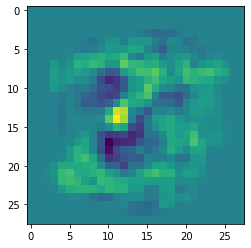

In [ ]:
img = W1[0].reshape(28, 28)
plt.imshow(img)

prediction: 2 label:  2




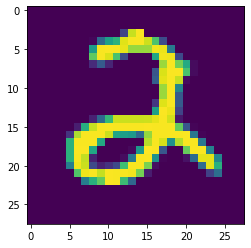

In [ ]:
index = 2205
print("prediction:",predict(train_X[index])[0], "label: ", train_y[index])
print("\n")
plt.imshow(train_X[index].reshape(28,28))

In [22]:
###Triple layer 

# lr = 0.000001
# for i in range(10000):
#   Z1 = W1.dot(X) + B1
#   A1 = reLU(Z1)

#   Z2 = W2.dot(A1) + B2
#   A2 = reLU(Z2)

#   Z3 = W3.dot(A2) + B3
#   A3 = softmax(Z3)

#   dZ3 = A3 - y

#   dW3 = dZ3.dot(A2.T)
#   dB3 = np.sum(dZ3, axis=1, keepdims=True)
  
#   dZ2 = W3.T.dot(dZ3) * d_reLU(Z2)

#   dW2 = dZ2.dot(A1.T)
#   dB2 = np.sum(dZ2, axis=1, keepdims=True)

#   dZ1 = W2.T.dot(dZ2) * d_reLU(Z1)

#   dW1 = dZ1.dot(X.T)
#   dB1 = np.sum(dZ1, axis=1, keepdims=True)

#   W1 -= dW1 * lr
#   B1 -= dB1 * lr

#   W2 -= dW2 * lr
#   B2 -= dB2 * lr

#   W3 -= dW3 * lr
#   B3 -= dB3 * lr

#   if i%500 == 0:
#     print(cost_function(y, A3))